In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
dataset = pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [10]:
x=pd.DataFrame(df2)
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


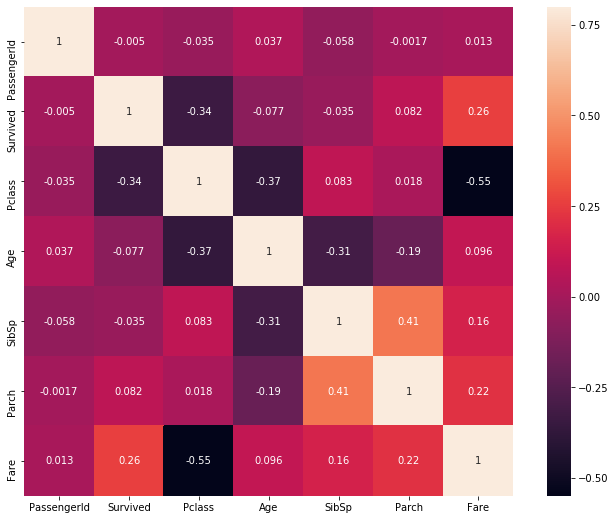

In [13]:
corrmat=dataset.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

In [7]:
useful_feat=['Survived','Sex','Age','SibSp','Fare','Embarked','Parch']

In [8]:
df=pd.DataFrame(dataset,columns=useful_feat)

In [9]:
df.head()

,Survived,Sex,Age,SibSp,Fare,Embarked,Parch
0,0,male,22.0,1,7.2500,S,0
1,1,female,38.0,1,71.2833,C,0
2,1,female,26.0,0,7.9250,S,0
3,1,female,35.0,1,53.1000,S,0
4,0,male,35.0,0,8.0500,S,0


In [10]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0}).astype(int)

In [11]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)

In [12]:
df.head()

,Survived,Sex,Age,SibSp,Fare,Embarked,Parch
0,0,0,22.0,1,7.2500,S,0
1,1,1,38.0,1,71.2833,C,0
2,1,1,26.0,0,7.9250,S,0
3,1,1,35.0,1,53.1000,S,0
4,0,0,35.0,0,8.0500,S,0


In [13]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [14]:
df.head()

,Survived,Sex,Age,SibSp,Fare,Parch,Embarked_Q,Embarked_S
0,0,0,22.0,1,7.2500,0,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,1,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,0,35.0,0,8.0500,0,0,1


In [15]:
X = df.iloc[:,[1,2,3,4,5,6,7]].values
y = df.iloc[:, 0].values

In [16]:
from xgboost import XGBClassifier
classifier= XGBClassifier(n_estimators=1000, max_depth=4,learning_rate=0.5)
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
y_pred=classifier.predict(X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [18]:
cm

array([[541,   8],
       [ 11, 331]])

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_pred, y)

0.978675645342312

In [20]:
#df2['Relatives']=df2['Parch']+df2['SibSp']
df2=pd.DataFrame(df2,columns=useful_feat)
df2['Sex'] = df2['Sex'].map({'female':1, 'male':0}).astype(int)

In [21]:
df2.drop('Survived',axis=1)

,Sex,Age,SibSp,Fare,Embarked,Parch
0,0,34.5,0,7.8292,Q,0
1,1,47.0,1,7.0000,S,0
2,0,62.0,0,9.6875,Q,0
3,0,27.0,0,8.6625,S,0
4,1,22.0,1,12.2875,S,1
5,0,14.0,0,9.2250,S,0
6,1,30.0,0,7.6292,Q,0
7,0,26.0,1,29.0000,S,1
8,1,18.0,0,7.2292,C,0
9,0,21.0,2,24.1500,S,0


In [22]:
df2=pd.get_dummies(df2,columns=['Embarked'],drop_first=True)
df2.head()

,Survived,Sex,Age,SibSp,Fare,Parch,Embarked_Q,Embarked_S
0,NaN,0,34.5,0,7.8292,0,1,0
1,NaN,1,47.0,1,7.0000,0,0,1
2,NaN,0,62.0,0,9.6875,0,1,0
3,NaN,0,27.0,0,8.6625,0,0,1
4,NaN,1,22.0,1,12.2875,1,0,1


In [23]:
X=df2.iloc[:,[1,2,3,4,5,6,7]].values
y_pred=classifier.predict(X)

In [24]:
df4=pd.DataFrame()
df4['PassengerId']=x['PassengerId']

df4['Survived']=classifier.predict(X)
df4.to_csv('sub.csv',index=False)